### Importing all the libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import sklearn

In [3]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [4]:
df = pd.read_csv('data/Employee.csv')

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [7]:
df=df.rename(columns = {'sales':'department'})

In [8]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
df['department']=np.where(df['department'] =='support', 'technical', df['department'])
df['department']=np.where(df['department'] =='IT', 'technical', df['department'])

In [11]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Converting categorical features into numerical

In [12]:
LE = LabelEncoder()

In [13]:
LE.fit(df['department'])

LabelEncoder()

In [14]:
df['department'] = LE.transform(df['department'])

In [15]:
LE.fit(df['salary'])

LabelEncoder()

In [16]:
df['salary'] = LE.transform(df['salary'])

In [17]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,6,1
1,0.80,0.86,5,262,6,0,1,0,6,2
2,0.11,0.88,7,272,4,0,1,0,6,2
3,0.72,0.87,5,223,5,0,1,0,6,1
4,0.37,0.52,2,159,3,0,1,0,6,1


In [18]:
x=df.drop(['left'],axis=1)
y = ['left']

### Splitting data into train/test split

In [21]:
df_train, df_test = train_test_split(df, test_size = 0.2)

In [22]:
x_train = df_train.drop(['left'],axis = 1)
x_test = df_test.drop(['left'],axis = 1)

In [23]:
y_train = df_train['left']
y_test = df_test['left']

## Logistic Regression

In [20]:
LR = LogisticRegression(max_iter=2000)

In [24]:
LR.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [25]:
print('Accuracy of the model using Logistic Regression is: {:.3f}'.format(accuracy_score(y_test, LR.predict(x_test)))) #Accuracy score

Accuracy of the model using Logistic Regression is: 0.750


In [26]:
print(classification_report(y_test, LR.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85      2253
           1       0.49      0.23      0.31       747

    accuracy                           0.75      3000
   macro avg       0.64      0.58      0.58      3000
weighted avg       0.71      0.75      0.71      3000



In [27]:
lr_y_pred = LR.predict(x_test)
# lr_cm = metrics.confusion_matrix(lr_y_pred, y_test, [1,0])
# sns.heatmap(lr_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
# plt.ylabel('True Numbers')
# plt.xlabel('Predicted Numbers')
# plt.title('Logistic Regression')

### Random Forest

In [28]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
print('Accuracy of the model using Random Forest : {:.3f}'.format(accuracy_score(y_test, rfc.predict(x_test))))

Accuracy of the model using Random Forest : 0.995


In [30]:
print(classification_report(y_test, rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2253
           1       1.00      0.98      0.99       747

    accuracy                           0.99      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [31]:
y_pred=rfc.predict(x_test)

In [32]:
# cm = metrics.confusion_matrix(y_pred, y_test, [1,0])

In [33]:
# sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
# plt.ylabel('True Numbers')
# plt.xlabel('Predicted Numbers')
# plt.title('Random Forest')

In [34]:
lr_roc_auc = roc_auc_score(y_test, LR.predict(x_test)) #roc curve using logistic regression
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(x_test)[:,1])

In [35]:
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(x_test))#roc curve using random forest
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc.predict_proba(x_test)[:,1])

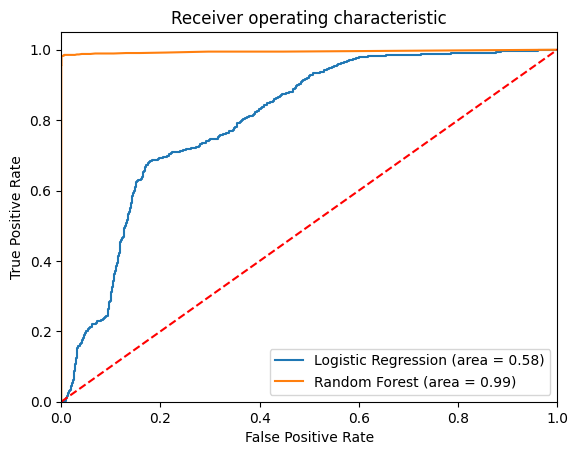

In [36]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [37]:
rfc.feature_importances_

array([0.34724036, 0.12198199, 0.17842226, 0.14347466, 0.18516466,
       0.00482536, 0.00085243, 0.01002613, 0.00801214])

In [38]:
df1=pd.DataFrame({'Features': x_train.columns, 'Feature_importance_Score': rfc.feature_importances_}).sort_values(by = ['Feature_importance_Score'],ascending = False,ignore_index  = True)

In [39]:
df1

,Features,Feature_importance_Score
0,satisfaction_level,0.347240
1,time_spend_company,0.185165
2,number_project,0.178422
3,average_montly_hours,0.143475
4,last_evaluation,0.121982
5,department,0.010026
6,salary,0.008012
7,Work_accident,0.004825
8,promotion_last_5years,0.000852


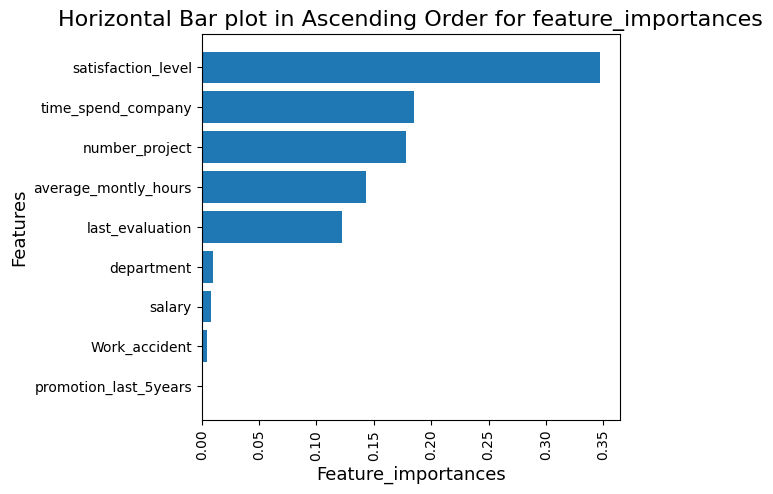

In [40]:
fig,ax = plt.subplots()
plt.barh('Features', 'Feature_importance_Score',data=df1)
plt.xlabel("Feature_importances", size=13)
plt.ylabel("Features", size=13)
plt.xticks(rotation=90)
ax.invert_yaxis()
fig.tight_layout()
plt.title("Horizontal Bar plot in Ascending Order for feature_importances", size=16)
plt.show()

##### As we can see from the above data and bar chart that "satisfaction_level","time_spend_company" and "number_project" are the most impotant features while predicting our target variable "left"